# Import library and load data

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import altair as alt
import tensorflow as tf
import joblib

from pandas.core.indexing import check_bool_indexer

In [32]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

# df = pd.read_csv(r"C:\Users\ppou\source\repos\AEC_Hackathon2021\Data\Data-Set-Material-Categories.csv")
df = pd.read_csv("Data-Set-Material-Categories.csv")
df.head

<bound method NDFrame.head of     Building Type       Location Foot print (m2)              GFA (m2)  \
0     Residential  North America       94 to 465        1,001 to 5,000   
1     Residential  North America    4646 to 9290     50,001 to 100,000   
2      Commercial  North America   9291 to 18580    100,001 to 200,000   
3      Commercial  North America     930 to 2323      10,001 to 25,000   
4     Residential  North America       94 to 465        1,001 to 5,000   
..            ...            ...             ...                   ...   
723    Commercial  North America     930 to 2323      10,001 to 25,000   
724    Commercial    Middle East      Over 92903        Over 1 million   
725    Commercial  North America     930 to 2323      10,001 to 25,000   
726    Commercial  North America      466 to 929       5,001 to 10,000   
727    Commercial    Middle East  46452 to 92903  500,001 to 1 million   

      Floor Count  Life Time (Years)  TCO2 (Total)  \
0          1 to 6          

In [33]:
df.describe()

,Life Time (Years),TCO2 (Total),TC02 (Normalized at 50 years),Wood %,Steel %,Concrete %,Wood EC %,Steel EC %,Concrete EC %
count,728.000,728.000,728.000,728.000,728.000,728.000,728.000,728.000,728.000
mean,54.286,446.169,451.815,66.676,7.349,25.975,25.989,26.507,47.504
std,16.934,354.387,382.233,41.116,7.844,34.213,39.619,30.803,33.746
min,20.000,32.210,21.500,0.000,0.000,0.000,0.000,0.000,0.000
25%,40.000,240.750,197.500,0.000,0.000,0.000,0.000,0.000,23.000
50%,50.000,360.200,360.100,95.000,5.000,0.000,0.000,15.000,38.000
75%,60.000,521.745,572.925,95.000,20.000,80.000,62.000,77.000,85.000
max,100.000,2745.000,3152.000,100.000,20.000,80.000,100.000,77.000,85.000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Building Type                  728 non-null    object 
 1   Location                       728 non-null    object 
 2   Foot print (m2)                728 non-null    object 
 3   GFA (m2)                       728 non-null    object 
 4   Floor Count                    728 non-null    object 
 5   Life Time (Years)              728 non-null    int64  
 6   TCO2 (Total)                   728 non-null    float64
 7   TC02 (Normalized at 50 years)  728 non-null    float64
 8   Building_Construction_Type     728 non-null    object 
 9   Wood %                         728 non-null    int64  
 10  Steel %                        728 non-null    int64  
 11  Concrete %                     728 non-null    int64  
 12  Wood EC %                      728 non-null    int

# Data Preparation

In [8]:
# Retrive value from columns
type_local = df['Building Type'].values
location = df['Location'].values
area = df['Foot print (m2)'].values
floors = df['Floor Count'].values
buld_life = df['Life Time (Years)'].values
co2 = df['TC02 (Normalized at 50 years)'].values
material = df['Building_Construction_Type']

print(f'type_local: {type_local[:5]}')
print(f'location: {location[:5]}')
print(f'area: {area[:5]}')
print(f'floors: {floors[:5]}')
print(f'buld_life: {buld_life[:5]}')
print(f'co2: {co2[:5]}')
print(f'material: {material[:5]}')

type_local: ['Residential' 'Residential' 'Commercial' 'Commercial' 'Residential']
location: ['North America' 'North America' 'North America' 'North America'
 'North America']
area: ['94 to 465' '4646 to 9290' '9291 to 18580' '930 to 2323' '94 to 465']
floors: ['1 to 6' '1 to 6' '15 to 25' '1 to 6' '1 to 6']
buld_life: [75 75 75 75 75]
co2: [21.5 28.3 33.3 34.3 50.2]
material: 0           Wood
1           Wood
2    Wood-Hybrid
3           Wood
4           Wood
Name: Building_Construction_Type, dtype: object


In [10]:
FData = []

for i in range(len(type_local)):
  input = type_local[i], location[i], area[i], floors[i], buld_life[i], co2[i], material[i]
  FData.append(input)

dframe = pd.DataFrame(FData)  
print(dframe)

               0              1               2             3   4        5  \
0    Residential  North America       94 to 465        1 to 6  75   21.500   
1    Residential  North America    4646 to 9290        1 to 6  75   28.300   
2     Commercial  North America   9291 to 18580      15 to 25  75   33.300   
3     Commercial  North America     930 to 2323        1 to 6  75   34.300   
4    Residential  North America       94 to 465        1 to 6  75   50.200   
..           ...            ...             ...           ...  ..      ...   
723   Commercial  North America     930 to 2323        1 to 6  50 2156.000   
724   Commercial    Middle East      Over 92903  More than 25  50 2661.000   
725   Commercial  North America     930 to 2323        1 to 6  50 2728.000   
726   Commercial  North America      466 to 929        1 to 6  50 2745.000   
727   Commercial    Middle East  46452 to 92903  More than 25  40 3152.000   

                    6  
0                Wood  
1              

In [11]:
#Droping the empty rows
clearedDf = dframe.dropna()

clearedDf = clearedDf.rename(columns={0 : 'Type', 1: 'Location', 2 : 'Area', 3 : 'Floors', 4 : 'Build_life', 5 : 'CO2', 6 : 'Building_Construction_Type'})

clearedDf = clearedDf[clearedDf.Type != 'Generic']
clearedDf = clearedDf[clearedDf.Type != 'Industrial']

In [12]:
#Saving it to the csv file 
#clearedDf.to_csv('clearedData.csv',index=False)

clearedDf.info()
clearedDf.head()

clearedDf.Type = pd.Categorical(clearedDf.Type)
clearedDf['Type_B'] = clearedDf.Type.cat.codes

clearedDf.Location = pd.Categorical(clearedDf.Location)
clearedDf['Location_B'] = clearedDf.Location.cat.codes

clearedDf.Area = pd.Categorical(clearedDf.Area)
clearedDf['Area_B'] = clearedDf.Area.cat.codes

clearedDf.Floors = pd.Categorical(clearedDf.Floors)
clearedDf['Floors_B'] = clearedDf.Floors.cat.codes

clearedDf.Building_Construction_Type = pd.Categorical(clearedDf.Building_Construction_Type)
clearedDf['Building_Construction_Type'] = clearedDf.Building_Construction_Type.cat.codes


pd.set_option('display.max_columns', None)
print(clearedDf.info())
print(clearedDf.head())

Area_B = clearedDf['Area_B'].values
CO2 = clearedDf['CO2'].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 727
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Type                        726 non-null    object 
 1   Location                    726 non-null    object 
 2   Area                        726 non-null    object 
 3   Floors                      726 non-null    object 
 4   Build_life                  726 non-null    int64  
 5   CO2                         726 non-null    float64
 6   Building_Construction_Type  726 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 727
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Type                        726 non-null    category
 1   Location                    726 non-

In [13]:
# We want to convert integers into floats based on the categories of FOOTPRINT_B, TOT_AREA_B, FLOORS_B
#                     -----0-----   -----1----  ------2----- etc.
footprint_bounds_cat = [18581, 46451, 2324, 4645, 46452, 92903, 4646, 9290, 466, 929, 9291, 18580, 0, 93, 930, 2323, 94, 465, 92903, 180000]
floor_bounds_cat = [1, 6, 15, 25, 7, 14, 25, 50]

In [14]:
def pick_value(column_feature, array_bounds, column_carbon):
  # print("Double of categories: ", (len(array_bounds)/2))
  # print("Number of categories: ", int(len(array_bounds)/2))
  test_array = np.empty(len(column_feature))
  for i in range(int(len(array_bounds)/2)):
    #print("category ", i)
    lower_bound = float(array_bounds[i*2])
    upper_bound = float(array_bounds[(i*2) +1])
    # print("lower bound", lower_bound)
    # print("upper bound", upper_bound)
    # create the array with carbon
    array_carbon = []
    for j in range(len(column_feature)):
      # print("problem index", j)
      # print(column_feature[j])
      if(column_feature[j] == i):
        array_carbon.append(column_carbon[j])

    
    # print("number of entries: ", len(array_carbon))
    CO_lower_bound = min(array_carbon)
    CO_upper_bound = max(array_carbon)

    # print("CO lower bound", CO_lower_bound)
    # print("CO upper bound", CO_upper_bound)

    for k in range(len(column_feature)):
      if(column_feature[k] == i):
        #print("before map", column_feature[k])
        # translate the carbon value to the range of the feature
        #column_feature[k] = float(lower_bound +((upper_bound - lower_bound) / (CO_upper_bound - CO_lower_bound))*(column_carbon[k] - CO_lower_bound))
        test_array[k] = round(float(lower_bound +((upper_bound - lower_bound) / (CO_upper_bound - CO_lower_bound))*(column_carbon[k] - CO_lower_bound)), 2)
        # print("co2 ", column_carbon[k])
        # print("after map", test_array[k])
    
  return test_array

In [15]:
column_c_np = np.asarray(CO2)
# AREA
column_f_np = np.asarray(Area_B)
test_area_mapped_fo = pick_value(column_f_np, footprint_bounds_cat, column_c_np)
clearedDf['clear_Area'] = test_area_mapped_fo

# FLOORS
column_floors = np.asarray(clearedDf['Floors_B'].values)
test_area_mapped_fl = pick_value(column_floors, floor_bounds_cat, column_c_np)
clearedDf['clear_floors'] = test_area_mapped_fl


pd.set_option('display.max_columns', None)
data = clearedDf
data.drop(columns=['Type', 'Location', 'Area', 'Floors',  'Build_life', 'Area_B', 'Floors_B', 'Area_B'], inplace=True)
#data = data.rename(columns={0 : 'CO2', 1: 'Building_Construction_Type', 2 : 'Type', 3 : 'Location', 4 : 'Area', 5 : 'Floors'}, inplace=True)
print(data.info())
print(data.head())
#print(data.describe())
#data.to_csv("final_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 727
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CO2                         726 non-null    float64
 1   Building_Construction_Type  726 non-null    int8   
 2   Type_B                      726 non-null    int8   
 3   Location_B                  726 non-null    int8   
 4   clear_Area                  726 non-null    float64
 5   clear_floors                726 non-null    float64
dtypes: float64(3), int8(3)
memory usage: 24.8 KB
None
     CO2  Building_Construction_Type  Type_B  Location_B  clear_Area  \
0 21.500                           2       1           4      94.000   
1 28.300                           2       1           4    4646.000   
2 33.300                           3       0           4    9291.000   
3 34.300                           2       0           4     930.000   
4 50.200                 

<AxesSubplot:>

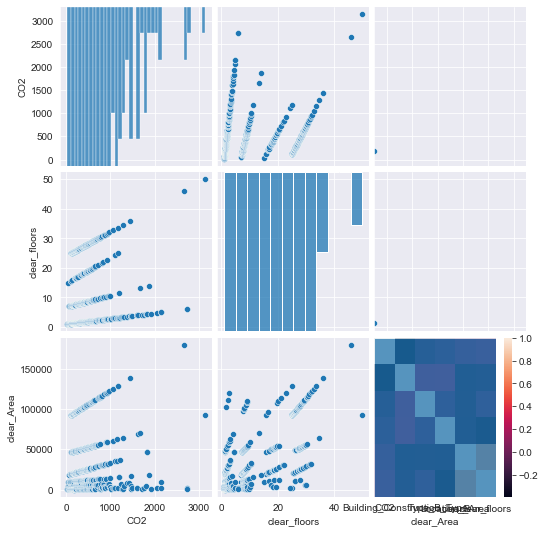

In [16]:
"""NOW WE FINALLY HAVE THE CLEAN DATASET"""

data_numerical = data[["CO2", "clear_floors", "clear_Area"]]
data_categorical = data[['Type_B', 'Location_B', 'Building_Construction_Type']]

sns.pairplot(data_numerical)

sns.heatmap(data.corr())

In [17]:
#declare features
# from one to the last one
X = data.iloc[:,data.columns != 'CO2']
print(X)
print(X.shape)

     Building_Construction_Type  Type_B  Location_B  clear_Area  clear_floors
0                             2       1           4      94.000         1.000
1                             2       1           4    4646.000         1.010
2                             3       0           4    9291.000        15.000
3                             2       0           4     930.000         1.020
4                             2       1           4     101.380         1.050
..                          ...     ...         ...         ...           ...
723                           0       0           4    2027.200         4.920
724                           1       0           3  180000.000        45.970
725                           0       0           4    2323.000         5.970
726                           0       0           4     929.000         6.000
727                           1       0           3   92903.000        50.000

[726 rows x 5 columns]
(726, 5)


In [21]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
# different domains so we need to scale
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)
print(X_scaled)

(726, 5)
[[ 0.87282199  2.01038968  0.67958381 -0.87653595 -0.89548714]
 [ 0.87282199  2.01038968  0.67958381 -0.7519637  -0.8945488 ]
 [ 1.78985349 -0.497416    0.67958381 -0.62484636  0.41818782]
 ...
 [-0.961241   -0.497416    0.67958381 -0.81553605 -0.42913253]
 [-0.961241   -0.497416    0.67958381 -0.85368493 -0.42631751]
 [-0.04420951 -0.497416   -0.13056044  1.66332037  3.70237523]]


In [20]:
#declare regression target

y = data.loc[:,"CO2"].to_numpy()
y = y.reshape(-1, 1)
from sklearn.preprocessing import MinMaxScaler
# try to scale y, it was better but you need to transform it to np array and reshape it
scalerY = MinMaxScaler()

#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y.shape)
print(y_scaled.shape)
print(y_scaled)

(726, 1)
(726, 1)
[[0.        ]
 [0.00217218]
 [0.00376937]
 [0.0040888 ]
 [0.00916786]
 [0.01098866]
 [0.01175531]
 [0.01197892]
 [0.01418304]
 [0.01443859]
 [0.01494969]
 [0.01549273]
 [0.01565245]
 [0.01638716]
 [0.01686632]
 [0.01836767]
 [0.01974126]
 [0.02133844]
 [0.02188149]
 [0.02213704]
 [0.02242453]
 [0.02252036]
 [0.0228398 ]
 [0.02347868]
 [0.02379812]
 [0.02482032]
 [0.02482032]
 [0.02507587]
 [0.02507587]
 [0.02561891]
 [0.02571474]
 [0.02613001]
 [0.02641751]
 [0.02699249]
 [0.0277272 ]
 [0.02795081]
 [0.02795081]
 [0.02852579]
 [0.02858968]
 [0.02957994]
 [0.02986743]
 [0.02986743]
 [0.03015493]
 [0.03034659]
 [0.03037853]
 [0.03050631]
 [0.03082575]
 [0.03082575]
 [0.0310813 ]
 [0.03114518]
 [0.03136879]
 [0.03242294]
 [0.03280626]
 [0.03280626]
 [0.03290209]
 [0.0331257 ]
 [0.03338125]
 [0.03357291]
 [0.0336368 ]
 [0.03370069]
 [0.03402012]
 [0.03411596]
 [0.03433956]
 [0.03437151]
 [0.034659  ]
 [0.03497844]
 [0.03513816]
 [0.03542565]
 [0.03555343]
 [0.03561731]
 [

In [23]:
# Split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(580, 5)
(146, 5)
(580, 1)
(146, 5)


# Defind Model

In [25]:
# Defind model
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(50, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
  
# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(1, activation= "sigmoid"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                300       
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,965
Trainable params: 1,965
Non-trainable params: 0
_________________________________________________________________


# Fit (train) model

In [28]:
# Fit model
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 7/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 8/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0044
Epoch 9/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 10/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 11/

15/15 [==============================] - 0s 3ms/step - loss: 9.1943e-04 - val_loss: 0.0032
Epoch 83/200
15/15 [==============================] - 0s 4ms/step - loss: 9.0415e-04 - val_loss: 0.0032
Epoch 84/200
15/15 [==============================] - 0s 4ms/step - loss: 8.9130e-04 - val_loss: 0.0031
Epoch 85/200
15/15 [==============================] - 0s 4ms/step - loss: 8.5334e-04 - val_loss: 0.0032
Epoch 86/200
15/15 [==============================] - 0s 4ms/step - loss: 8.4647e-04 - val_loss: 0.0031
Epoch 87/200
15/15 [==============================] - 0s 3ms/step - loss: 8.4493e-04 - val_loss: 0.0032
Epoch 88/200
15/15 [==============================] - 0s 3ms/step - loss: 8.6402e-04 - val_loss: 0.0031
Epoch 89/200
15/15 [==============================] - 0s 3ms/step - loss: 8.6110e-04 - val_loss: 0.0031
Epoch 90/200
15/15 [==============================] - 0s 4ms/step - loss: 8.3294e-04 - val_loss: 0.0032
Epoch 91/200
15/15 [==============================] - 0s 4ms/step - loss: 8.7

15/15 [==============================] - 0s 3ms/step - loss: 5.1159e-04 - val_loss: 0.0026
Epoch 161/200
15/15 [==============================] - 0s 4ms/step - loss: 5.2752e-04 - val_loss: 0.0026
Epoch 162/200
15/15 [==============================] - 0s 3ms/step - loss: 5.3652e-04 - val_loss: 0.0025
Epoch 163/200
15/15 [==============================] - 0s 4ms/step - loss: 5.7073e-04 - val_loss: 0.0026
Epoch 164/200
15/15 [==============================] - 0s 5ms/step - loss: 4.9752e-04 - val_loss: 0.0025
Epoch 165/200
15/15 [==============================] - 0s 4ms/step - loss: 5.1150e-04 - val_loss: 0.0025
Epoch 166/200
15/15 [==============================] - 0s 3ms/step - loss: 4.9594e-04 - val_loss: 0.0026
Epoch 167/200
15/15 [==============================] - 0s 4ms/step - loss: 5.4256e-04 - val_loss: 0.0026
Epoch 168/200
15/15 [==============================] - 0s 3ms/step - loss: 5.3544e-04 - val_loss: 0.0026
Epoch 169/200
15/15 [==============================] - 0s 3ms/step - 

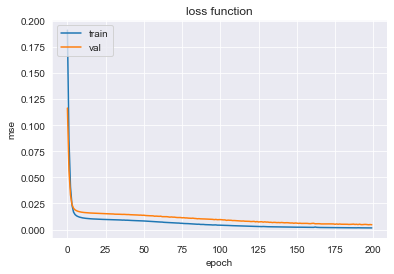

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation model

In [29]:
loss_test = model.evaluate(X_test,y_test)
print('mse_test:', loss_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0014
mse_test: 0.001353187719359994


In [30]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

5/5 [==============================] - 0s 1ms/step


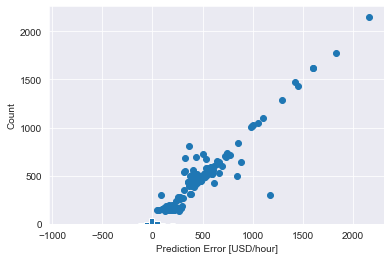

In [31]:
# Plot Evaluate x test and x train 
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [USD/hour]')
_ = plt.ylabel('Count')

# Save model

In [ ]:
"""SAVE MODEL AND SCALERS"""

model.save("/content/gdrive/MyDrive/temporary/LearnModel.h5")
# Save scalers
joblib.dump(scalerY, '/content/gdrive/MyDrive/temporary/scalerY.pkl')
joblib.dump(scalerX, '/content/gdrive/MyDrive/temporary/scalerx.pkl')

X_not_scaled = scalerX.inverse_transform(X)
print(X_not_scaled) 